In [353]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

In [354]:
#import the data from a csv-file
df = pd.read_csv('data/eda.csv')

<Axes: >

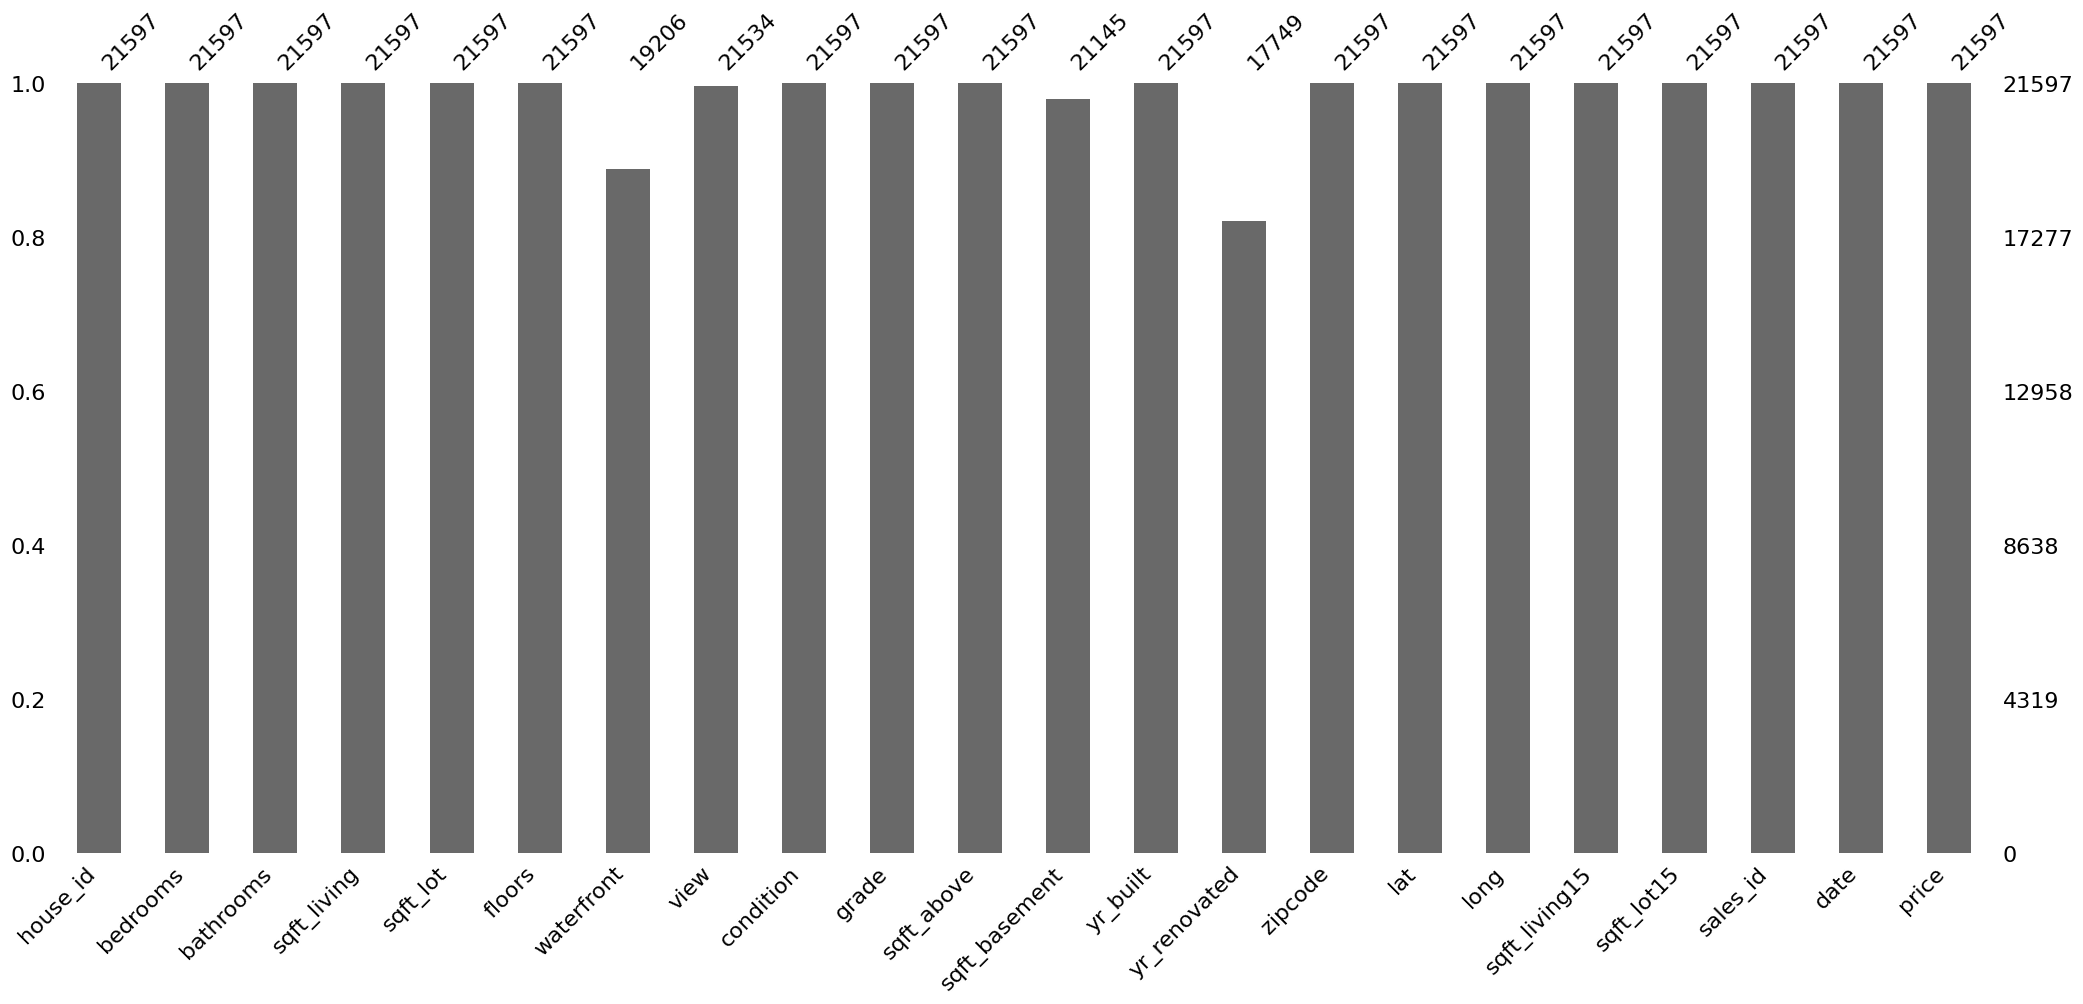

In [355]:
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

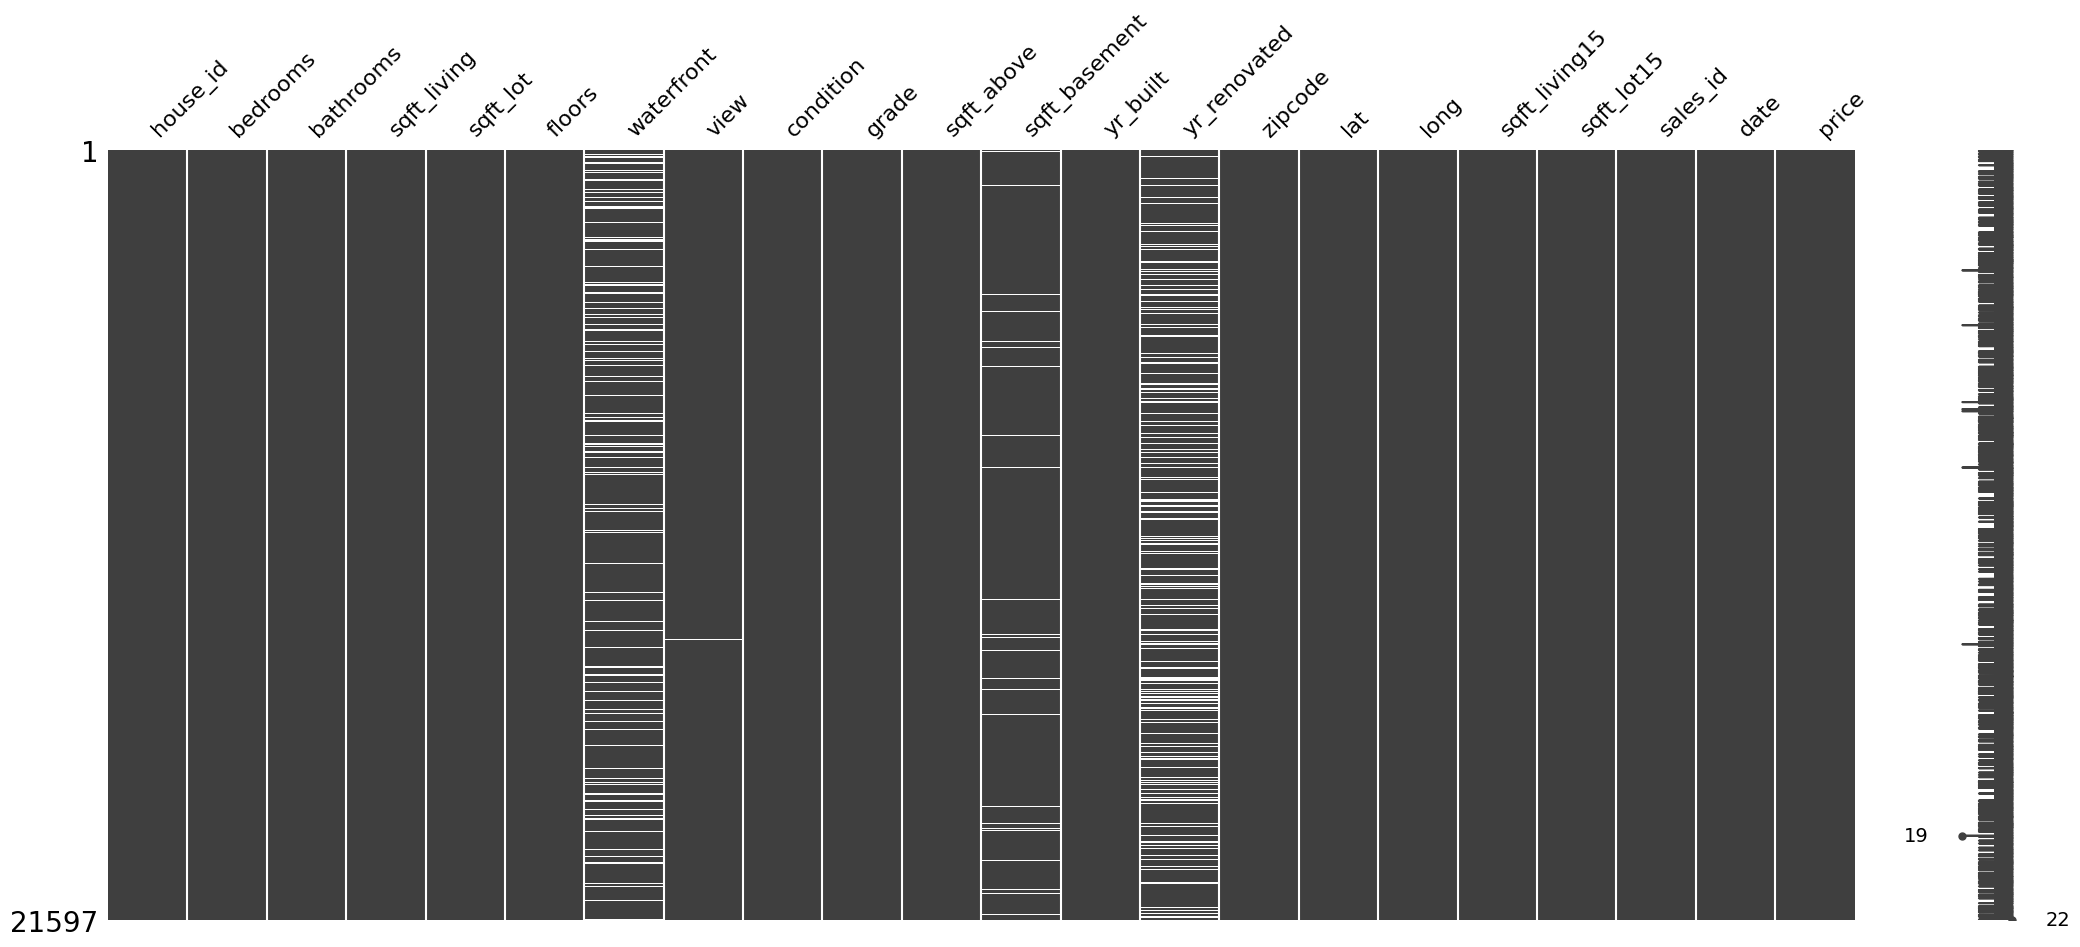

In [356]:
# plotting missing data matrix
msno.matrix(df)

In [357]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [358]:
# check statistics
print(df.loc[:, :'grade'].describe())
print()
print(df.loc[:, 'sqft_above':].describe())

           house_id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  
count  21597.000000  19206.000000  21534.000000  21597.000000  21597.000000  
mean       1.494096      0.007602      0.233863      3.409825      7.657915  
std        0.539683      0.086858      0.765686      0

In [359]:
# check head
print(df.loc[:, :'grade'].head())
print()
print(df.loc[:, 'sqft_above':].head())

     house_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520       3.0       1.00       1180.0    5650.0     1.0         NaN   
1  6414100192       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  5631500400       2.0       1.00        770.0   10000.0     1.0         0.0   
3  2487200875       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  1954400510       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  
0   0.0          3      7  
1   0.0          3      7  
2   0.0          3      6  
3   0.0          5      7  
4   0.0          3      8  

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0      1180.0            0.0      1955           0.0    98178  47.5112   
1      2170.0          400.0      1951       19910.0    98125  47.7210   
2       770.0            0.0      1933           NaN    98028  47.7379   
3      1050.0          910.0      1965          

In [360]:
# check tail
print(df.loc[:, :'grade'].tail())
print()
print(df.loc[:, 'sqft_above':].tail())

         house_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21592   263000018       3.0       2.50       1530.0    1131.0     3.0   
21593  6600060120       4.0       2.50       2310.0    5813.0     2.0   
21594  1523300141       2.0       0.75       1020.0    1350.0     2.0   
21595   291310100       3.0       2.50       1600.0    2388.0     2.0   
21596  1523300157       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  
21592         0.0   0.0          3      8  
21593         0.0   0.0          3      8  
21594         0.0   0.0          3      7  
21595         NaN   0.0          3      8  
21596         0.0   0.0          3      7  

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21592      1530.0            0.0      2009           0.0    98103  47.6993   
21593      2310.0            0.0      2014           0.0    98146  47.5107   
21594      1020.0            0.0      2009           0.0    98

In [361]:
# check how many unique values are in each column
df.nunique()

house_id         21420
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               752
sqft_living15      777
sqft_lot15        8682
sales_id         21597
date               372
price             3622
dtype: int64

In [362]:
# print unique values for assessable columns
for i in df.columns:
    if df[i].nunique() < 30:
        print(i)
        print(np.sort(df[i].unique()))

bedrooms
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 33.]
bathrooms
[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5  7.75
 8.  ]
floors
[1.  1.5 2.  2.5 3.  3.5]
waterfront
[ 0.  1. nan]
view
[ 0.  1.  2.  3.  4. nan]
condition
[1 2 3 4 5]
grade
[ 3  4  5  6  7  8  9 10 11 12 13]


In [363]:
# count house_id occurrence
df_count_sales = df.groupby('house_id').count().sort_values('sales_id', ascending=False)
df_multi_sales = df_count_sales[df_count_sales.sales_id > 1]['sales_id']
df_multi_sales

house_id
795000620     3
9828200460    2
7200179       2
9809000020    2
9407110710    2
             ..
324000530     2
109200390     2
302000375     2
251300110     2
123039336     2
Name: sales_id, Length: 176, dtype: int64

In [364]:
# check for grade and condition to assess if high or low values are better, is there a correlation?
print(df.groupby('condition')['grade'].median())
print(df.groupby('grade')['condition'].median())

condition
1    6.0
2    7.0
3    8.0
4    7.0
5    7.0
Name: grade, dtype: float64
grade
3     5.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
Name: condition, dtype: float64


In [365]:
# check correlation of prices with condition and grade
print(df.groupby('condition')['price'].median())
print(df.groupby('grade')['price'].median())

condition
1    270000.0
2    279000.0
3    450250.0
4    440000.0
5    526000.0
Name: price, dtype: float64
grade
3      262000.0
4      200000.0
5      228700.0
6      275276.5
7      375000.0
8      510000.0
9      720000.0
10     914327.0
11    1280000.0
12    1820000.0
13    2980000.0
Name: price, dtype: float64


In [366]:
# check number of houses in each category of condition and grade
print(df.groupby('condition')['house_id'].count())
print(df.groupby('grade')['house_id'].count())

condition
1       29
2      170
3    14020
4     5677
5     1701
Name: house_id, dtype: int64
grade
3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: house_id, dtype: int64


--- yr_renovated ---
[    0. 19910.    nan 20020. 20100. 19920. 20130. 19940. 19780. 20050.
 20030. 19840. 19540. 20140. 20110. 19830. 19450. 19900. 19880. 19770.
 19810. 19950. 20000. 19990. 19980. 19700. 19890. 20040. 19860. 20070.
 19870. 20060. 19850. 20010. 19800. 19710. 19790. 19970. 19500. 19690.
 19480. 20090. 20150. 19740. 20080. 19680. 20120. 19630. 19510. 19620.
 19530. 19930. 19960. 19550. 19820. 19560. 19400. 19760. 19460. 19750.
 19640. 19730. 19570. 19590. 19600. 19670. 19650. 19340. 19720. 19440.
 19580.]
[   nan 19910. 20020. 20100. 19920. 20130. 19940. 19780. 20050. 20030.
 19840. 19540. 20140. 20110. 19830. 19450. 19900. 19880. 19770. 19810.
 19950. 20000. 19990. 19980. 19700. 19890. 20040. 19860. 20070. 19870.
 20060. 19850. 20010. 19800. 19710. 19790. 19970. 19500. 19690. 19480.
 20090. 20150. 19740. 20080. 19680. 20120. 19630. 19510. 19620. 19530.
 19930. 19960. 19550. 19820. 19560. 19400. 19760. 19460. 19750. 19640.
 19730. 19570. 19590. 19600. 19670. 19650. 1934

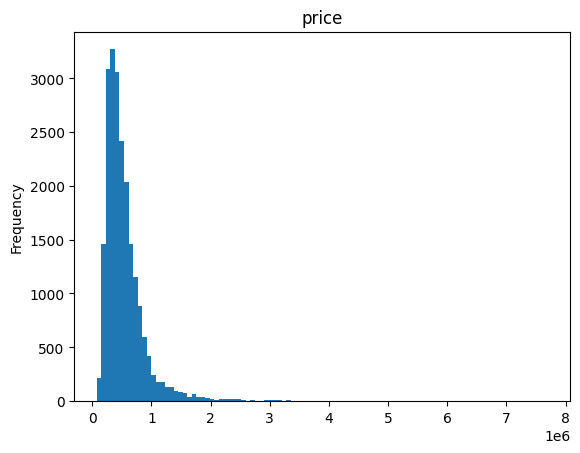

2000000.0


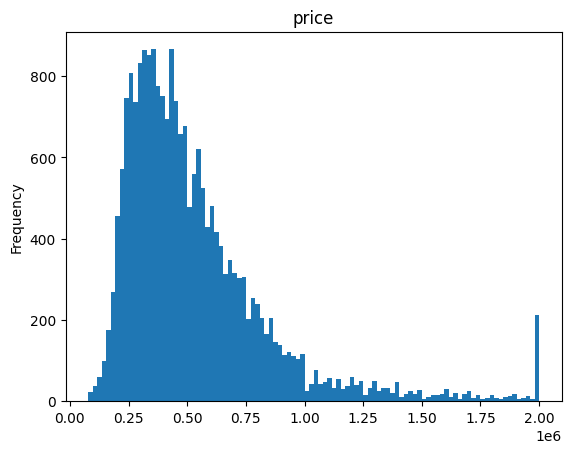

In [367]:
df_clean = df.copy()

# cleaning yr_renovated
print('--- yr_renovated ---')
print(df.yr_renovated.unique())
df_clean.loc[df_clean['yr_renovated'] == 0., 'yr_renovated'] = np.nan
print(df_clean.yr_renovated.unique())

# cleaning sqft_basement
print('--- sqft_basement ---')
df_clean.loc[df_clean['sqft_basement'] == 0., 'sqft_basement'] = np.nan

# cleaning sqft_lot
print('--- sqft_lot ---')
print(df.sqft_lot.max())
print(df.sqft_lot.quantile(0.99))
print(df.sqft_lot.quantile(0.95))
df_clean.loc[df_clean['sqft_lot'] > 100000., 'sqft_lot'] = 100000.
print(df_clean.sqft_lot.max())

# cleaning sqft_lot15
print('--- sqft_lot15 ---')
df_clean.loc[df_clean['sqft_lot15'] > 100000., 'sqft_lot15'] = 100000.

# just looking at price
print('--- price ---')
print(df.price.max())
print(df.price.quantile(0.99))
print(df.price.quantile(0.95))
df_clean.price.plot(kind='hist', title='price', sharex=False, sharey=False, bins=100)
plt.show()
df_price = df_clean.price.copy()
df_price.loc[df_price > 2000000.] = 2000000.
print(df_price.max())
df_price.plot(kind='hist', title=i, sharex=False, sharey=False, bins=100)
plt.show()

house_id
bedrooms


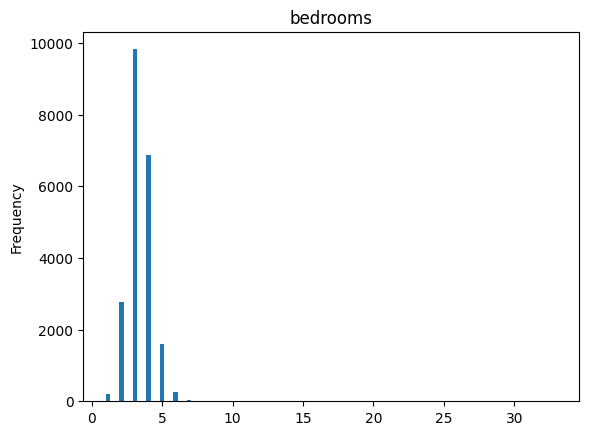

bathrooms


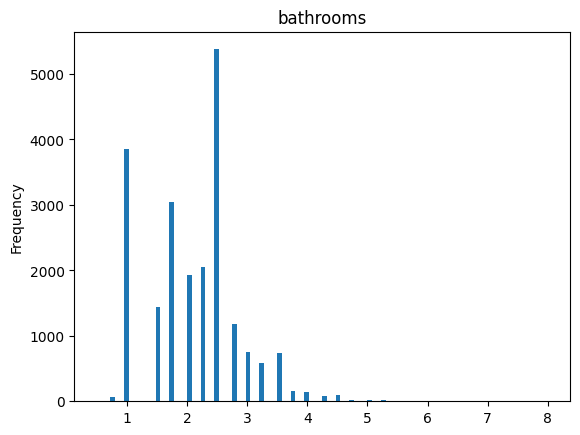

sqft_living


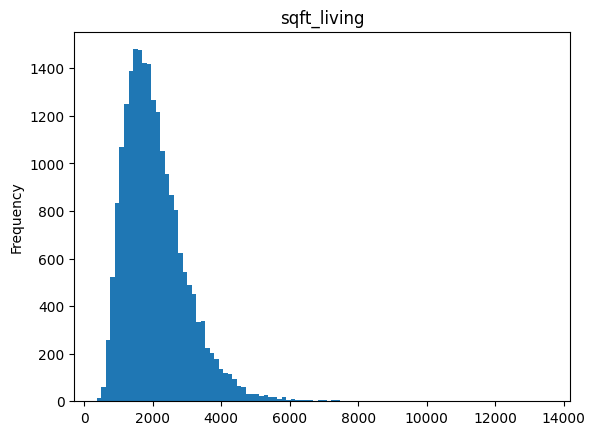

sqft_lot


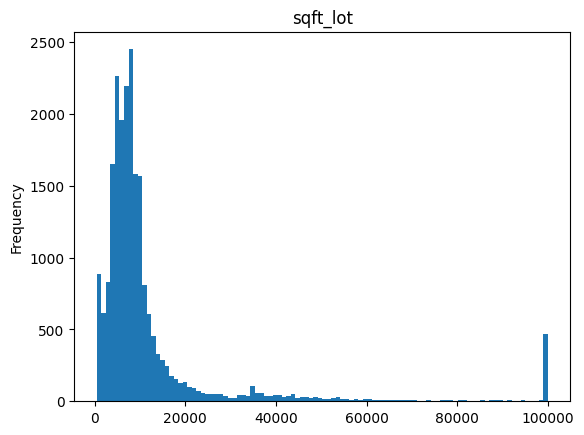

floors


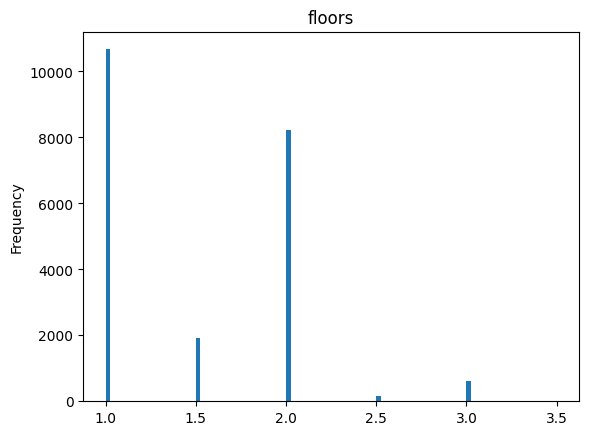

waterfront
view
condition
grade
sqft_above


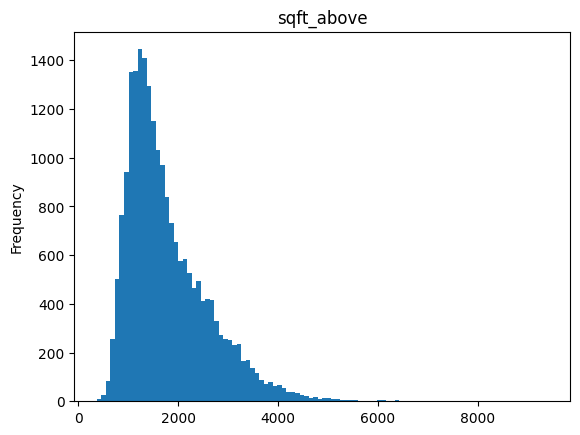

sqft_basement


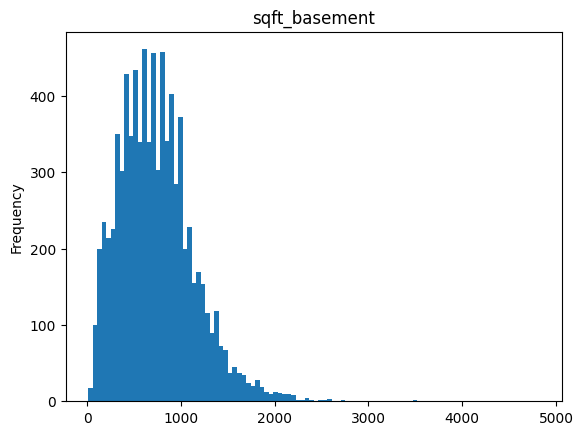

yr_built


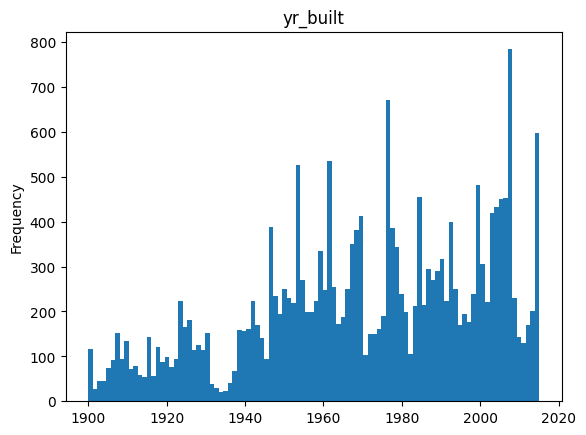

yr_renovated


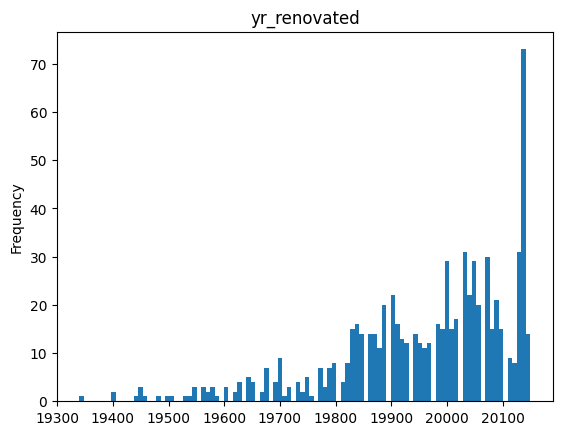

zipcode
lat


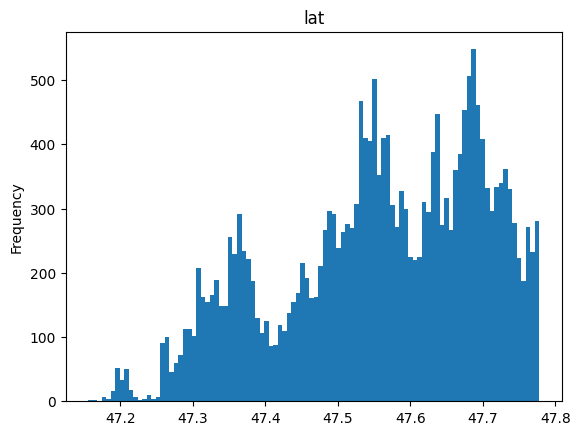

long


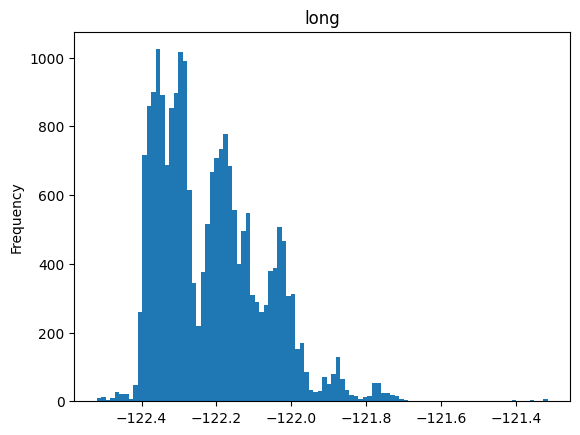

sqft_living15


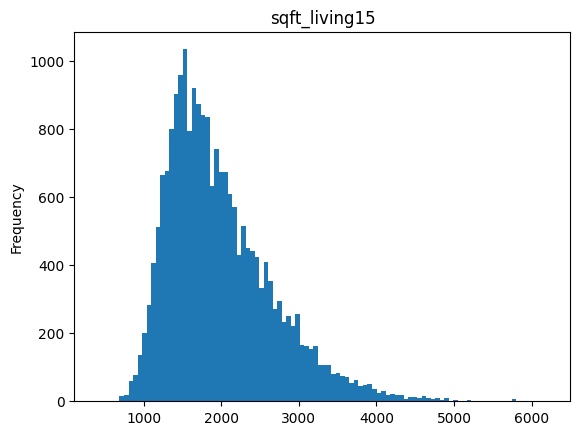

sqft_lot15


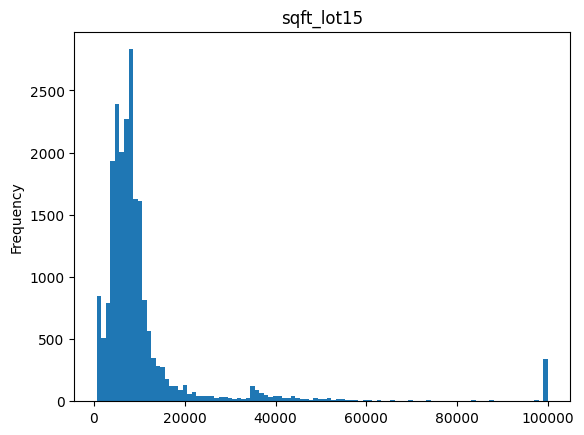

sales_id
date
price


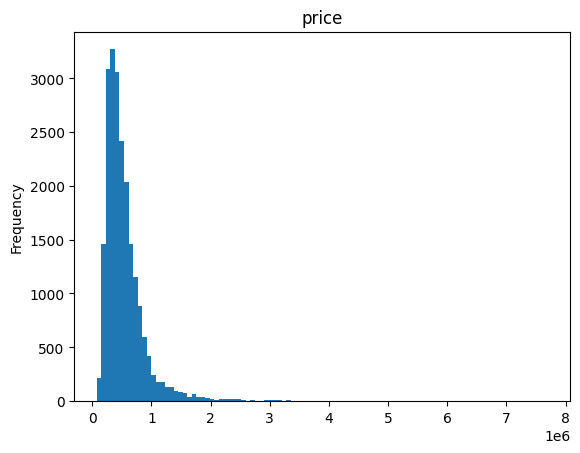

In [368]:
# check histograms of continous variables
for i in df_clean.columns:
    print(i)
    if i in ['house_id', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'sales_id', 'date']:
        pass
    else:
        df_clean[i].plot(kind='hist', title=i, sharex=False, sharey=False, bins=100)
        plt.show()

waterfront


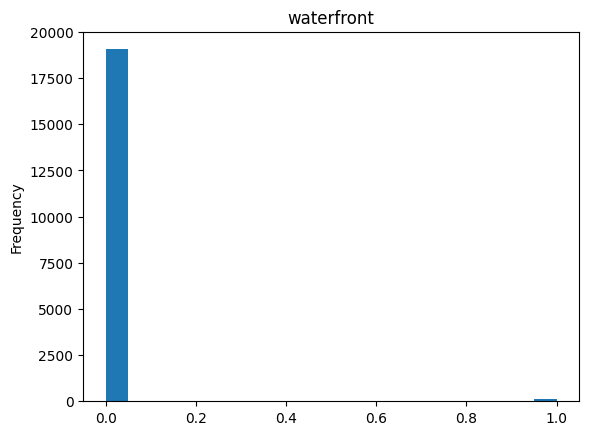

view


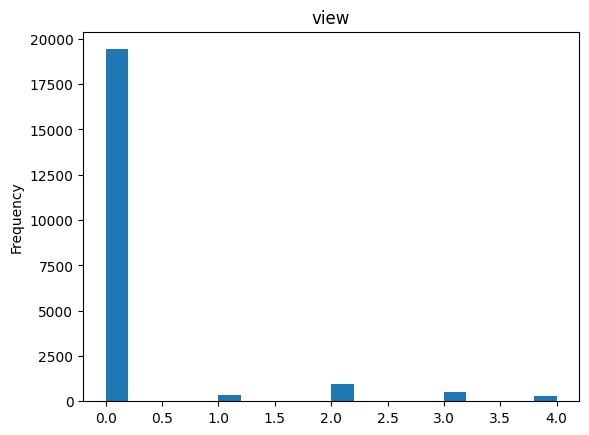

condition


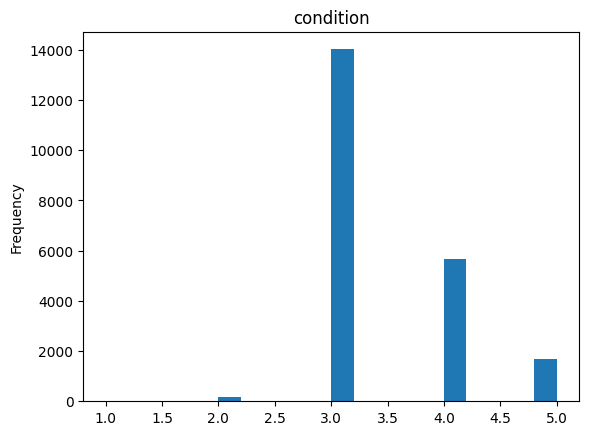

grade


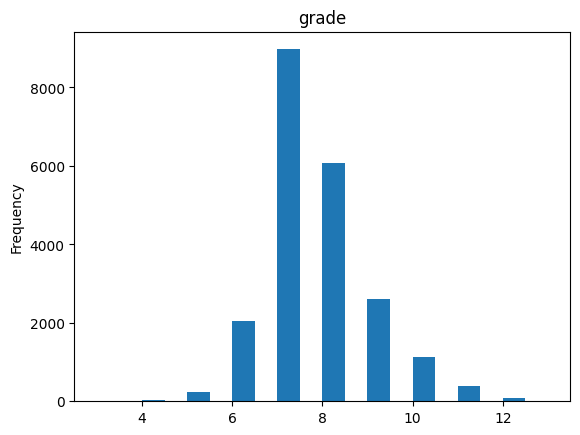

zipcode


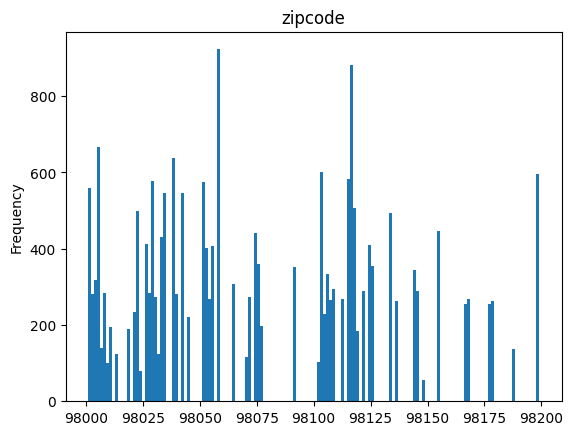

In [369]:
# check histograms of categorial variables
for i in df_clean.columns:
    if i not in ['waterfront', 'view', 'condition', 'grade', 'zipcode']:
        pass
    elif i == 'zipcode':
        print(i)
        df_clean[i].plot(kind='hist', title=i, bins=150)
        plt.show()
    else:
        print(i)
        df_clean[i].plot(kind='hist', title=i, bins=20)
        plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7316 to 16580
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   condition      21597 non-null  int64         
 7   grade          21597 non-null  int64         
 8   sqft_above     21597 non-null  float64       
 9   sqft_basement  8318 non-null   float64       
 10  yr_built       21597 non-null  int64         
 11  zipcode        21597 non-null  int64         
 12  lat            21597 non-null  float64       
 13  long           21597 non-null  float64       
 14  sqft_living15  21597 non-null  float64       
 15  sqft_lot15     21597 

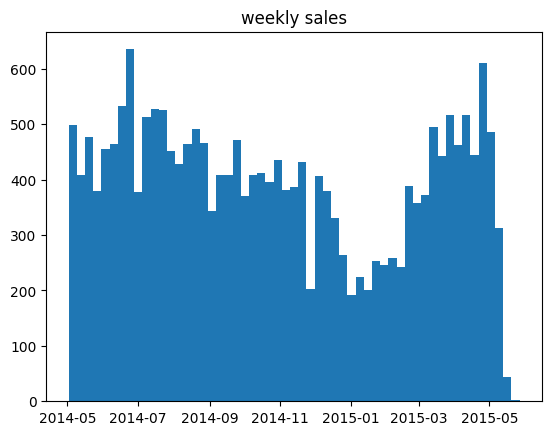

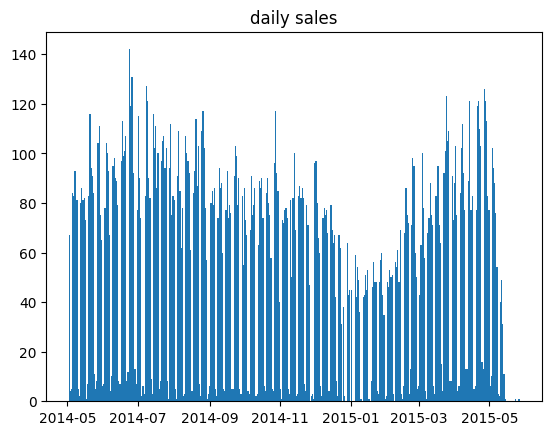

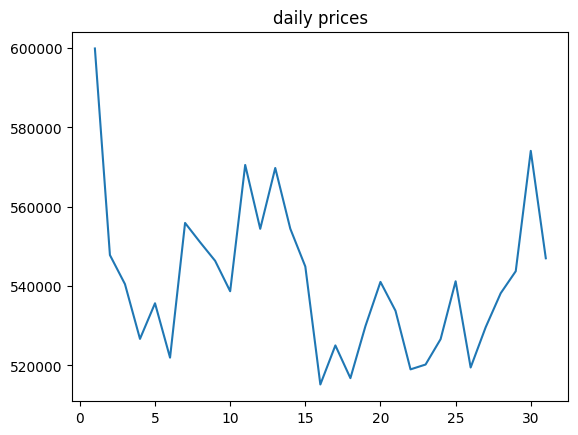

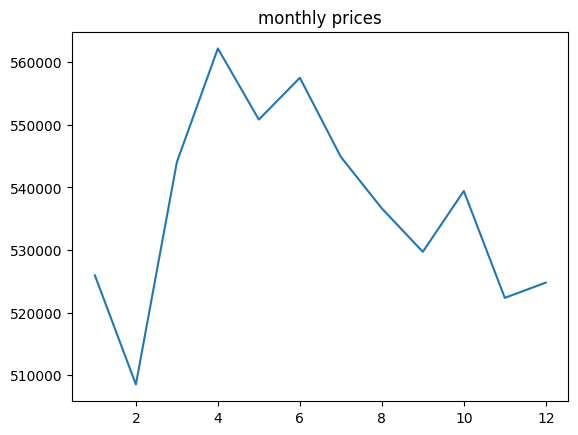

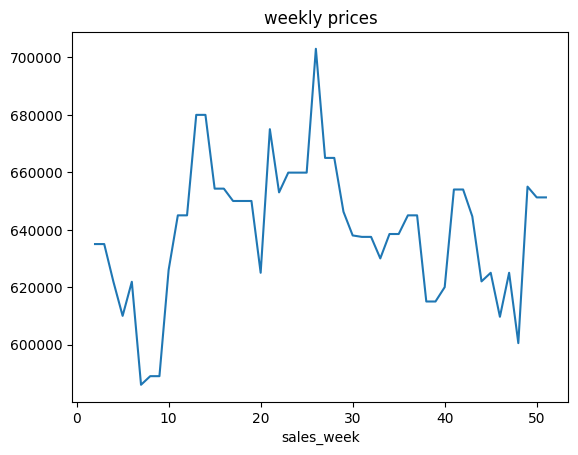

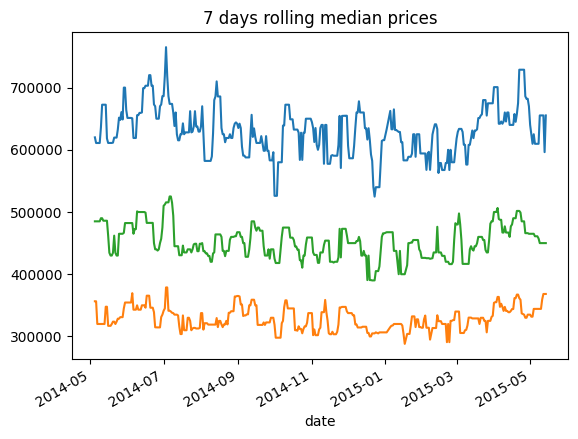

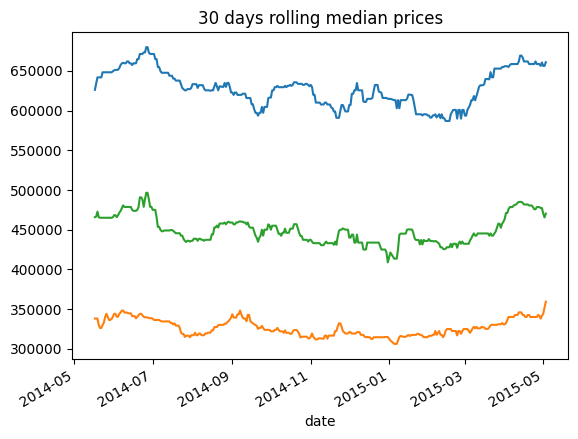

In [370]:
# check sales

df_sales = df_clean.loc[:,
    ['house_id', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price',
    'date']
].sort_values('date')

df_sales.date = pd.to_datetime(df_sales.date)
df_sales.eval('sales_year = date.dt.year', inplace=True)
df_sales.eval('sales_month = date.dt.month', inplace=True)
df_sales.eval('sales_day = date.dt.day', inplace=True)
df_sales['sales_week'] = df_sales['date'].apply(lambda x: x.isocalendar()[1])
print(df_sales.info())
print(df_sales.sales_week.unique())
plt.hist(df_sales.date, bins=391//7)
plt.title('weekly sales')
plt.show()
plt.hist(df_sales.date, bins=391)
plt.title('daily sales')
plt.show()
df_group_day = df_sales.groupby(df_sales.sales_day).mean()
plt.plot(df_group_day.price)
plt.title('daily prices')
plt.show()
df_group_month = df_sales.groupby(df_sales.sales_month).mean()
plt.plot(df_group_month.price)
plt.title('monthly prices')
plt.show()
# df_group_week = df_sales.groupby(df_sales.sales_week).median()
# plt.plot(df_group_week.price)
df_group_week = df_sales.groupby(df_sales.sales_week)['price'].quantile(0.75).rolling(3, center=True).quantile(0.5)
df_group_week.plot()
plt.title('weekly prices')
plt.show()
df_group_7days = df_sales.groupby(df_sales.date).quantile(0.75).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_sales.groupby(df_sales.date).quantile(0.25).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_sales.groupby(df_sales.date).quantile(0.5).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
plt.title('7 days rolling median prices')
plt.show()
df_group_14days = df_sales.groupby(df_sales.date).quantile(0.75).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_sales.groupby(df_sales.date).quantile(0.25).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_sales.groupby(df_sales.date).quantile(0.5).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
plt.title('30 days rolling median prices')
plt.show()

df_sales.to_csv('data/sales.csv',index=False)